# Collecting and Using Data in Python

## Laila A. Wahedi, PhD
### Massive Data Institute Postdoctoral Fellow <br>McCourt School of Public Policy<br>

### Follow along: Wahedi.us, Current Presentation

# Follow Along

1. Go to https://notebooks.azure.com/Laila/libraries/MDI-workshopFA18
2. Clone the directory

<img src='step1.png'>

# Follow Along
3. Sign in with any Microsoft Account (Hotmail, Outlook, Azure, etc.)
 * Create a folder to put it in, mark as private or public
 
<img src='step2.png'>

# Follow Along
4. Open a notebook
  * Open *this* notebook to have the code to play with
   * Data_collection_Analysis2.ipynb
  * Open a blank notebook to follow along and try on your own. 
  
<img src='step4.png'>

# Do you get this error? (Or any other error)

### HTTP Error 400. The size of the request headers is too long

# Clear your cookies then refresh the browser. 

# Your Environment
* Jupyter Notebook Hosted in Azure
* Want to install it at home? 
  * Install the Anaconda distribution of Python
  https://www.anaconda.com/download/
  * Install Jupyter Notebooks
  http://jupyter.org/install

# Your Environment
* ctrl/apple+ enter runs a cell 

<img src='notebook.png'>

# Your Environment
* Persistent memory
  * If you run a cell, results remain as long as the kernel

### ORDER MATTERS!

<img src='persist.png'>  

# Agenda for today:
* Collect data from APIs
* Scrape data
* Merge data into a data frame
* Statsmodels package
* SKLearn package

# Packages to Import For Today
* Should all be included with your Anaconda Python Distribution
 * Raise your hand for help if you have trouble
* Our plots will use matplotlib, similar to plotting in matlab
* %matplotlib inline tells Jupyter Notebooks to display your plots
* from allows you to import part of a package

In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup as bs
import requests
import time
# from ggplot import *

# Other Useful Packages (not used today)
* ggplot: the familiar ggplot2 you know and love from R
* seaborn: Makes your plots prettier
* plotly: makes interactive visualizations, similar to shiny
* gensim: package for doing natural language processing
* scipy: used with numpy to do math. Generates random numbers from distributions, does matrix operations, etc. 

# Scraping


# How the Internet Works

* Code is stored on servers
* Web addresses point to the location of that code 


1. Going to an address or clicking a button sends requests to the server for data, 
2. The server returns the requested content
3. Your web browser interprets the code to render the web page 

<img src='Internet.png'>

# Scraping: 
* Collect the website code by emulating the process:
  * Can haz cheezburger?
  <img src='burger.png'>
* Extract the useful information from the scraped code:
  * Where's the beef? 
  <img src='beef.png'>

# API
### Application Programming Interface 
* The set of rules that govern communication between two pieces of code
* Code requires clear expected inputs and outputs
* APIs define required inputs to get the outputs in a format you can expect. 
* Easier than scraping a website because gives you exactly what you ask for

<img src="beef_direct.png">

# API Keys
## APIs often require identification
* Go to https://docs.airnowapi.org 
* Register and get a key
* Log in to the site
* Select web services

## DO NOT SHARE YOUR KEY
* It will get stolen and used for malicious activity

# Do Not Share Your Key
* Make your notebook private:

<img src='settings.png'>

# Do Not Share Your Key
* Make your notebook private:

<img src='private.png'>

# Requests to a Server


<div style="float: left;width:50%">
<h3> GET</h3>
<ul><li>Requests data from the server</li>
<li> Encoded into the URL</li></ul>
<img src='get.png'>
</div>
<div style="float: left;width:50%">
<h3>POST</h3>
<ul><li>Submits data to be processed by the server</li>
<li>For example, filter the data</li>
<li>Can attach additional data not directly in the url</li></ul>
<img src='post.png'>
</div>

# Using an API
* Change the parameters. What changes?

<img src='api.png'>

# Requests encoded in the URL
### Parsing a URL

### <font color="blue">http://www.airnowapi.org/aq/observation/zipCode/historical/</font><font color="red">?</font><br><font color="green">format</font>=<font color="purple">application/json</font><font color="orange">&<br></font><font color="green">zipCode</font>=<font color="purple">20007</font><font color="orange">&</font><br><font color="green">date</font>=<font color="purple">2017-09-05T00-0000</font><font color="orange">&</font><br><font color="green">distance</font>=<font color="purple">25</font><font color="orange">&</font><br><font color="green">API_KEY</font>=<font color="purple">D9AA91E7-070D-4221-867CC-XXXXXXXXXXX</font>

* The base URL or endpoint is:<br>
<font color="blue">http://www.airnowapi.org/aq/observation/zipCode/historical/</font>

* <font color="red">?</font> tells us that this is a query. 
* <font color="orange">&</font> separates name, value pairs within the request.

* Five <font color="green"><strong>name</strong></font>, <font color="purple"><strong>value</strong></font> pairs POSTED 
 * format, zipCode, date, distance, API_KEY

# Request from Python
### prepare the url
* List of attributes
* Join them with "&" to form a string

In [3]:
base_url = "http://www.mywebsite.com/data/api?"
attributes = ["key1=value1",
            "key2=value2",
            "API_KEY=39DC3727-09BD-XXXX-XXXX-XXXXXXXXXXXX"
             ]
post_url = '&'.join(attributes)
print(base_url+post_url)

http://www.mywebsite.com/data/apikey1=value1&key2=value2&API_KEY=39DC3727-09BD-XXXX-XXXX-XXXXXXXXXXXX


# Prepare another URL on your own

In [4]:
base_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/"
attributes = ["format=application/json",
            "zipCode=20007",
            "date=2017-09-05T00-0000",
            "distance=25",
            "API_KEY=39DC3727-09BD-48C4-BBD8-XXXXXXXXXXXX"
             ]
post_url = '&'.join(attributes)
print(base_url+post_url)

http://www.airnowapi.org/aq/observation/zipCode/historical/format=application/json&zipCode=20007&date=2017-09-05T00-0000&distance=25&API_KEY=39DC3727-09BD-48C4-BBD8-XXXXXXXXXXXX


#### Where did the ? go? 

# Requests from Python
* Use requests package
* .get(url,post) for get and post requests
 * First parameter: url for get request
 * Optional second parameter: post data if doing a post request
 * Requests posts the data to the url, so you don't need to add a ? to the base url
 * Leave the post data out for a get request instead of a post request
* Requested json format
    * Returns list of dictionaries
    * Look at the returned keys

In [17]:
ingredients=requests.get(base_url, post_url)
ingredients = ingredients.json()
print(ingredients[0])

{'DateObserved': '2017-09-05 ', 'HourObserved': 0, 'LocalTimeZone': 'EST', 'ReportingArea': 'Metropolitan Washington', 'StateCode': 'DC', 'Latitude': 38.919, 'Longitude': -77.013, 'ParameterName': 'OZONE', 'AQI': 47, 'Category': {'Number': 1, 'Name': 'Good'}}


# View Returned Data:
* Each list gives a different parameter for zip code and date we searched

In [18]:
for item in ingredients:
           AQIType = item['ParameterName']
           City=item['ReportingArea']
           AQIValue=item['AQI']
           print("For Location ", City, " the AQI for ", AQIType, "is ", AQIValue)

For Location  Metropolitan Washington  the AQI for  OZONE is  47
For Location  Metropolitan Washington  the AQI for  PM2.5 is  61
For Location  Metropolitan Washington  the AQI for  PM10 is  13


# Ethics
* Check the websites terms of use
* <strong>Don't hit too hard:</strong>
    * Insert pauses in your code to act more like a human
    * Scraping can look like an attack
    * Server will block you without pauses
* APIs often have rate limits
* Use the time package to pause for a second between hits

In [ ]:
time.sleep(1)

# Collect Our Data
### Python helps us automate repetitive tasks. 
* Don't download each datapoint you want separately
* Get a list of zip codes we want
 * take a subset to demo, so it doesn't take too long and so we don't all hit too hard from the same ip
 * California zip codes from asthma emergency room visits

# Review from last week: Asthma Data
* Load asthma data from csv
* Display a few rows
* Fix the zip codes
* Pivot to have one row per zip code (repeated rows for children, adults, all)

# Load from csv, display

In [7]:
asthma_data = pd.read_csv('asthma-emergency-department-visit-rates-by-zip-code.csv')
asthma_data.head(2)

,Year,ZIP code,Age Group,Number of Visits,Age-adjusted rate,County Fips code,County
0,2015,"90004\n(34.07646, -118.309453)",Children (0-17),117.0,91.7,6037,LOS ANGELES
1,2015,"90011\n(34.007055, -118.258872)",Children (0-17),381.0,102.8,6037,LOS ANGELES


# Fix the zip codes
* Fix zip codes

In [8]:
asthma_data[['zip','coordinates']] = asthma_data.loc[:,'ZIP code'].str.split(
                                                        pat='\n',expand=True)
asthma_data.drop('ZIP code', axis=1,inplace=True)
asthma_data.head(2)

,Year,Age Group,Number of Visits,Age-adjusted rate,County Fips code,County,zip,coordinates
0,2015,Children (0-17),117.0,91.7,6037,LOS ANGELES,90004,"(34.07646, -118.309453)"
1,2015,Children (0-17),381.0,102.8,6037,LOS ANGELES,90011,"(34.007055, -118.258872)"


# Pivot the data so age group are columns

In [9]:
asthma_unstacked = asthma_data.pivot_table(index = ['Year',
                                                    'zip',
                                                    'County',
                                                    'coordinates',
                                                    'County Fips code'], 
                                           columns = 'Age Group', 
                                           values = 'Number of Visits')
asthma_unstacked.reset_index(drop=False,inplace=True)
asthma_unstacked.head(2)

Age Group,Year,zip,County,coordinates,County Fips code,Adults (18+),All Ages,Children (0-17)
0,2009,90001,LOS ANGELES,"(33.973252, -118.249154)",6037,206.0,409.0,203.0
1,2009,90002,LOS ANGELES,"(33.949079, -118.247877)",6037,204.0,418.0,214.0


### Now we have some zip codes!

# Automate Data Collection
* Request the data for those zipcodes on a day in 2015 (you pick, fire season July-Oct)
 * Be sure to sleep between requests
* Store that data as you go into a dictionary
 * Key: zip code
 * Value: Dictionary of the air quality parameters and their value

In [ ]:
base_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/"
zips = asthma_unstacked.zip.unique()
zips = zips[:450]
date ="date=2015-09-01T00-0000"
api_key = "API_KEY=39DC3727-09BD-48C4-BBD8-XXXXXXXXXXXX"
return_format = "format=application/json"
zip_str = "zipCode="
post_url = "&".join([date,api_key,return_format,zip_str])
data_dict = {}
for zipcode in zips:
    time.sleep(1)
    zip_post = post_url + str(zipcode)
    ingredients = requests.get(base_url, zip_post)
    ingredients = ingredients.json()
    zip_data = {}
    for data_point in ingredients:
        AQIType = data_point['ParameterName']
        AQIVal = data_point['AQI']
        zip_data[AQIType] = AQIVal
    data_dict[zipcode]= zip_data

In [ ]:
base_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/"
zips = asthma_unstacked.zip.unique()
date ="date=2015-09-{}T00-0000"
api_key = "API_KEY=XXX"
return_format = "format=application/json"
zip_str = "zipCode="
post_url = "&".join([date,api_key,return_format,zip_str])
# data_dict = {}
time.sleep(3600)
for d in ['01','05','10','15','20','25','30',]:
    if d =='01':
        ziplist = zips[449:]
    else:
        ziplist = zips
    for zipcode in ziplist:
        time.sleep(1)
        zip_post = post_url.format(d) + str(zipcode)
        ingredients = requests.get(base_url, zip_post)
        try:
            ingredients = ingredients.json()
        except:
            if ingredients.text[0:26]=='<WebServiceError><Message>':
                time.sleep(3605)
            else:
                print(zipcode)
        zip_data = {}
        for data_point in ingredients:
            AQIType = data_point['ParameterName']
            AQIVal = data_point['AQI']
            zip_data[AQIType] = AQIVal
        zip_data['day'] = int(d)
        data_dict[zipcode]= zip_data
pickle.dump(data_dict,open('ca_aqi_data.p','wb'))

In [183]:
for i, z in enumerate(zips):
    if z==zipcode:
        print(i)
len(data_dict)
pickle.dump(data_dict,open('AQI_data_raw.p','wb'))

949


# Scraping: Parsing HTML
* What about when you don't have an API that returns dictionaries?
* HTML is a markup language that displays data (text, images, etc)
* Puts content within nested tags to tell your browser how to display it

***

### &lt;Section_tag>
### &emsp; &lt;tag> Content &lt;/tag>
### &emsp; &lt;tag> Content &lt;/tag>
### &lt; /Section_tag>
### &lt;Section_tag>
### &emsp; &lt;tag> <font color="red">Beef</font> &lt;/tag>
### &lt; /Section_tag>

# Find the tags that identify the content you want:
* First paragraph of wikipedia article: 
https://en.wikipedia.org/wiki/Data_science
* Inspect the webpage: 
 * Windows: ctrl+shift+i
 * Mac: ctrl+alt+i
 
<img src="wikipedia_scrape.png">


# Parsing HTML with Beautiful Soup
### Beautiful Soup takes the raw html and parses the tags so you can search through them. 
* text attribute returns raw html text from requests
* Ignore the warning, default parser is fine
* We know it's the first paragraph tag in the body tag, so: 
 * Can find first tag of a type using <strong>.</strong>
* What went wrong?

In [24]:
ingredients = requests.get("https://en.wikipedia.org/wiki/Data_science")
soup = bs(ingredients.text)
print(soup.body.p)

<p class="mw-empty-elt">
</p>


# Use Find Feature to Narrow Your Search
* Find the unique div we identified
 * Remember the underscore: "class_"
* Find the p tag within the resulting html
* Use an index to return just the first paragraph tag
* Use the text attribute to ignore all the formatting and link tags

In [15]:
parser_div = soup.find("div", class_="mw-parser-output")
wiki_content = parser_div.find_all('p')
print(wiki_content[1])
print('*****************************************')
print(wiki_content[1].text)

<p><b>Data science</b> is an <a class="mw-redirect" href="/wiki/Interdisciplinary" title="Interdisciplinary">interdisciplinary</a> field that uses scientific methods, processes, algorithms and systems to extract <a href="/wiki/Knowledge" title="Knowledge">knowledge</a> and insights from <a href="/wiki/Data" title="Data">data</a> in various forms, both structured and unstructured,<sup class="reference" id="cite_ref-:0_1-0"><a href="#cite_note-:0-1">[1]</a></sup><sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup> similar to <a href="/wiki/Data_mining" title="Data mining">data mining</a>.
</p>
*****************************************
Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from data in various forms, both structured and unstructured,[1][2] similar to data mining.



# 1. List the contents
# 2. Get all links in the history section
  * Hint: chrome's inspect replaces "&" with "&amp;" in links

# List Contents

In [28]:
parser_div = soup.find("div", id="toc")
wiki_content = parser_div.find_all('ul')
for item in wiki_content:
    print(item.text)


1 History
2 Relationship to statistics
3 See also
4 References



# Get All Links in the History Section
* Hint: chrome's inspect replaces "&" with "&amp;" in links

In [56]:
wiki_content = soup.find_all('a',href=True)
in_hist = False
links = []
for l in wiki_content:
    link = l['href']
    if link == '/w/index.php?title=Data_science&action=edit&section=2':
        in_hist = False
    if in_hist:
        links.append(link)
    if link =="/w/index.php?title=Data_science&action=edit&section=1":
        in_hist = True
print(links)

['/wiki/Computer_science', '/wiki/Peter_Naur', '/wiki/Datalogy', '#cite_note-15', '#cite_note-16', '#cite_note-Hayashi-3', '/wiki/C.F._Jeff_Wu', '#cite_note-cfjwutk-17', '/wiki/University_of_Michigan', '#cite_note-cfjwu01-18', '#cite_note-cfjwutk-17', '#cite_note-cfjwu02-19', '/wiki/Prasanta_Chandra_Mahalanobis', '/wiki/Indian_Statistical_Institute', '#cite_note-cleveland01-20', '#cite_note-ics12-21', '#cite_note-dsj12-22', '#cite_note-dsj02-23', '#cite_note-jds03-24', '#cite_note-25', '/wiki/Wikipedia:Citation_needed', '/wiki/Jim_Gray_(computer_scientist)', '#cite_note-TansleyTolle2009-4', '#cite_note-BellHey2009-5', '#cite_note-26', '/wiki/Harvard_Business_Review', '#cite_note-Harvard-6', '/wiki/DJ_Patil', '/wiki/Jeff_Hammerbacher', '#cite_note-27', 'http://euads.org', '#cite_note-28', '/wiki/General_Assembly_(school)', '/wiki/The_Data_Incubator', '#cite_note-29', '/wiki/American_Statistical_Association', '#cite_note-ASA-30', '#cite_note-31', 'http://www.gfkl.org/welcome/', '/wiki/Un

# Use a for loop and scrape the first paragraph from a bunch of wikipedia articles
* Add your own subjects

In [20]:
topics = ['Data_scraping','Machine_learning','Statistics','Linear_algebra',
         'Cluster_analysis','Scientific_modelling','Analysis','Linear_regression']
base_url = 'https://en.wikipedia.org/wiki/'
paragraphs = []
for topic in topics:
    url = base_url.format(topic)
    ingredients = requests.get(base_url+topic)
    soup = bs(ingredients.text)
    parser_div = soup.find("div", class_="mw-parser-output")
    wiki_content = parser_div.find_all('p')
    for p in range(10):
        if len(wiki_content[p].text)>10:
            paragraphs.append(wiki_content[p].text)
            break
    time.sleep(1)
print(dict(zip(topics,paragraphs)))

{'Data_scraping': 'Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from data in various forms, both structured and unstructured,[1][2] similar to data mining.\n', 'Machine_learning': 'Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from data in various forms, both structured and unstructured,[1][2] similar to data mining.\n', 'Statistics': 'Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from data in various forms, both structured and unstructured,[1][2] similar to data mining.\n', 'Linear_algebra': 'Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from data in various forms, both structured and unstructured,[1][2] simila

# Back To Our Data
* If it's still running, go ahead and stop it by pushing the square at the top of the notebook: 
<img src="interrupt.png">
* Save what you collected, don't want to hit them twice!

In [61]:
pickle.dump(data_dict,open('AQI_data_raw.p','wb'))

# Subset down to the data we have:
* use the isin() method to include only those zip codes we've already collected

In [63]:
collected = list(data_dict.keys())
asthma_2015_sub = asthma_unstacked.loc[(asthma_unstacked.zip.isin(collected))&
                                       (asthma_unstacked.Year == 2015),:]

# Create a dataframe from the new AQI data

In [67]:
aqi_data = pd.DataFrame.from_dict(data_dict, orient='index')
aqi_data.reset_index(drop=False,inplace=True)
aqi_data.rename(columns={'index':'zip'},inplace=True)
aqi_data.head()

,zip,OZONE,PM2.5,PM10
0,90001,36,NaN,NaN
1,90002,36,NaN,NaN
2,90003,36,NaN,NaN
3,90004,54,NaN,NaN
4,90005,54,NaN,NaN


# Combine The Data
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html
* Types of merges:
 * Left: Use only rows from the dataframe you are merging into
 * Right: use only rows from the dataframe you are inserting, (the one in the parentheses)
 * Inner: Use only rows that match between both
 * Outer: Use all rows, even if they only appear in one of the dataframes
* On: The variables you want to compare
 * Specify right_on and left_on if they have different names

In [156]:
asthma_aqi = asthma_2015_sub.merge(aqi_data,how='outer',on='zip')
asthma_aqi.rename(columns = {'Adults (18+)':'Adults',
                             'All Ages':'Incidents',
                             'Children (0-17)':'Children'},inplace=True)
asthma_aqi.head(2)

,Year,zip,County,coordinates,County Fips code,Adults,Incidents,Children,OZONE,PM2.5,PM10
0,2015.0,90001,LOS ANGELES,"(33.973252, -118.249154)",6037.0,229.0,441.0,212.0,36.0,NaN,NaN
1,2015.0,90002,LOS ANGELES,"(33.949079, -118.247877)",6037.0,249.0,476.0,227.0,36.0,NaN,NaN


# Look At The Data: Histogram
* 20 bins

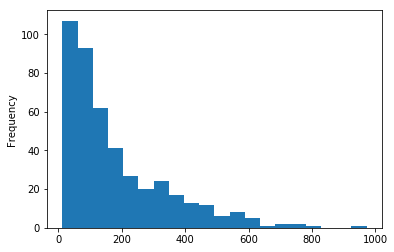

In [74]:
asthma_aqi.Incidents.plot.hist(20)

# Look At The Data: Smoothed Distribution

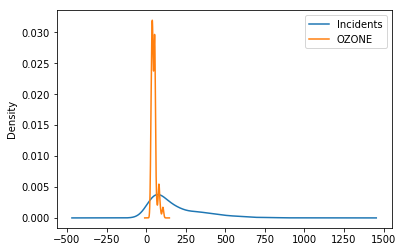

In [75]:
asthma_aqi.loc[:,['Incidents','OZONE']].plot.density()

# Look at particulates
* There is a lot of missingness in 2015
* Try other variables, such as comparing children and adults

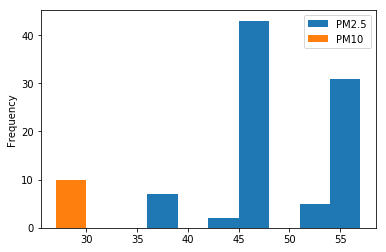

In [76]:
asthma_aqi.loc[:,['PM2.5','PM10']].plot.hist()

# Scatter Plot
* Try some other combinations
* Our data look clustered, but we'll ignore that for now

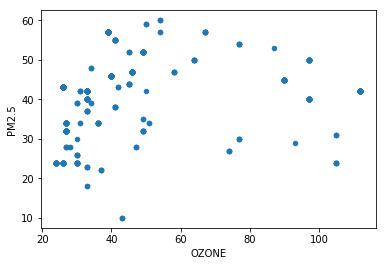

In [327]:
asthma_aqi.plot.scatter('OZONE','PM2.5')

# Run a regression:
* Note: statsmodels supports equation format like R <br>
http://www.statsmodels.org/dev/example_formulas.html

In [77]:
y =asthma_aqi.loc[:,'Incidents']
x =asthma_aqi.loc[:,['OZONE','PM2.5']]
x['c'] = 1
ols_model1 = sm.OLS(y,x,missing='drop')
results = ols_model1.fit()
print(results.summary())
pickle.dump([results,ols_model1],open('ols_model_results.p','wb'))

                            OLS Regression Results                            
Dep. Variable:              Incidents   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.022
Date:                Tue, 23 Oct 2018   Prob (F-statistic):              0.364
Time:                        20:12:10   Log-Likelihood:                -523.77
No. Observations:                  83   AIC:                             1054.
Df Residuals:                      80   BIC:                             1061.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
OZONE         -6.8458      6.033     -1.135      0.2

# Evaluate the model with some regression plots
* Learn more here: <br>
https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

# Partial Regressions to see effect of each variable

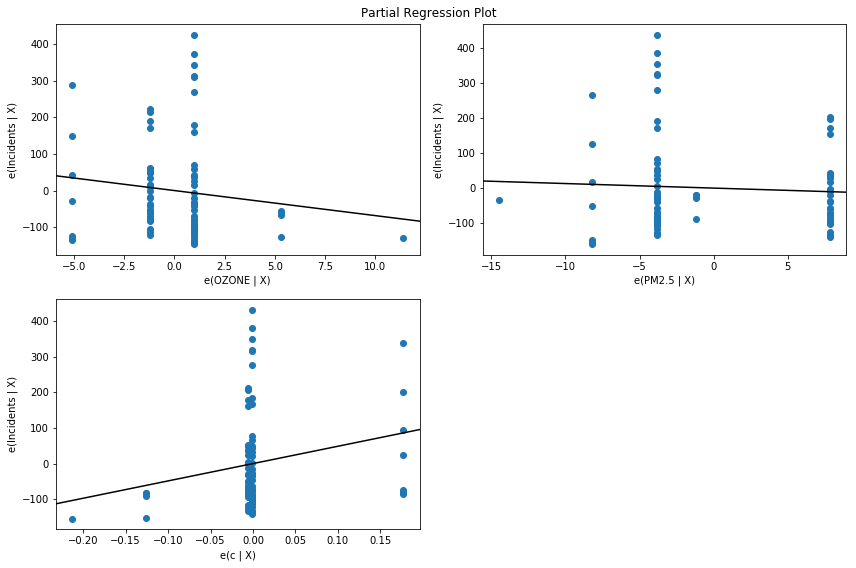

In [85]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

# Population confound
* Fires spread in less populated areas
* Fewer people to have asthma attacks in less populated areas
* Collect population data
* Use pandas to read the html table directly

In [137]:
ingredients = requests.get('https://www.california-demographics.com/zip_codes_by_population')
soup = bs(ingredients.text)
table = soup.find("table")
population = pd.read_html(str(table),flavor='html5lib')[0]
population.rename(columns=population.iloc[0],inplace=True)
population.drop(index=0,inplace=True)
population.head(2)

,California Zip Codes by Population Rank,Zip Code,Population
1,1,90650,106360
2,2,90011,104762


# Fix zipcode column
* Split doubled up zip codes into separate lines

In [138]:
population[['zip','zip2']]=population.loc[:,'Zip Code'].str.split(
                                                    pat =' and ',
                                                    expand=True)
population.Population = population.Population.astype(np.float)
population.loc[population.zip2!=None,'Population']=population.loc[population.zip2!=None,'Population']/2
temp_pop = population.loc[population.zip!=None,['Population','zip2']].copy()
temp_pop.rename(columns={'zip2':'zip'},inplace=True)
population = pd.concat([population.loc[:,['Population','zip']],
                        temp_pop],axis=0)
population.head(2)

,Population,zip
1,53180.0,90650
2,52381.0,90011


# Re-run Regression 
* With population
* Without PM2.5


In [157]:
asthma_aqi = asthma_aqi.merge(population,how='left',on='zip')
y =asthma_aqi.loc[:,'Adults']
x =asthma_aqi.loc[:,['OZONE','Population']]
x['c'] = 1
glm_model = sm.GLM(y,x,missing='drop',family=sm.families.Poisson())
ols_model2 = sm.OLS(y,x,missing='drop')
glm_results = glm_model.fit()
results = ols_model2.fit()
print(glm_results.summary())
pickle.dump([glm_results,glm_model],open('glm_model_pop_results.p','wb'))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Adults   No. Observations:                  411
Model:                            GLM   Df Residuals:                      408
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8129.5
Date:                Tue, 23 Oct 2018   Deviance:                       13698.
Time:                        21:45:59   Pearson chi2:                 1.58e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
OZONE          0.0037      0.000     12.595      0.000       0.003       0.004
Population  4.883e-05   3.76e-07    130.032      0.0

# Poisson Regression
* Summary above was a Poisson regression instead of ols.
* Use GLM() to run a generalized linear model instead of an ols
* Specify the type of regression with family. We have count data, so: 
    * sm.GLM(y,x,missing='drop',sm.families.Poisson())
* GLMs don't have all the fancy diagnostic plots, so we'll continue with ols results for now. 

# Partial Regressions

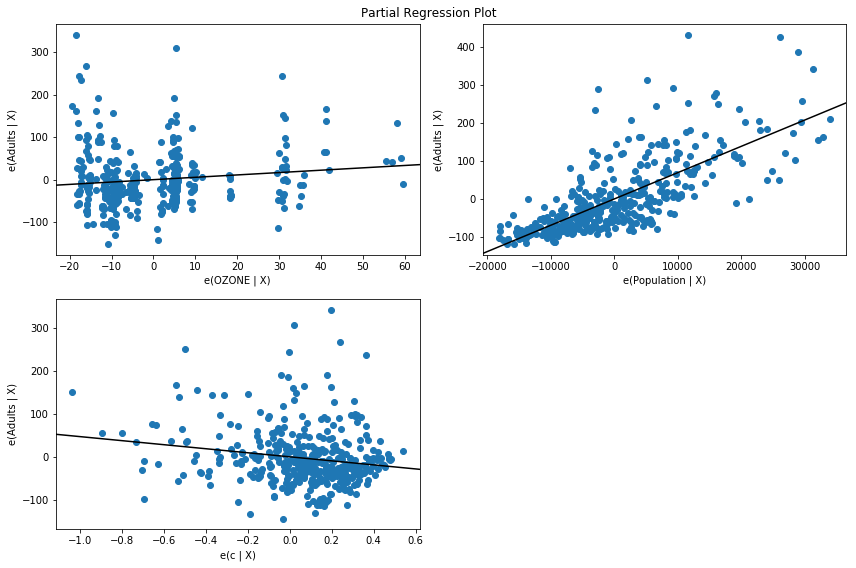

In [158]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

# Influence plot for outsized-effect of any observations

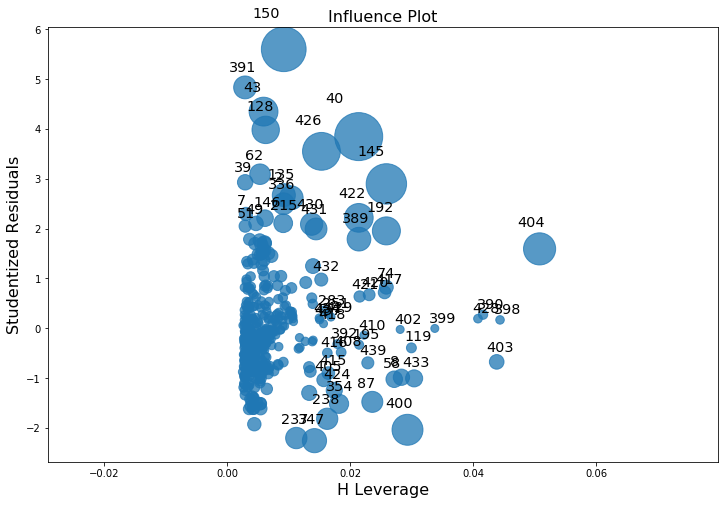

In [159]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion="cooks")

# Diagnostic plots

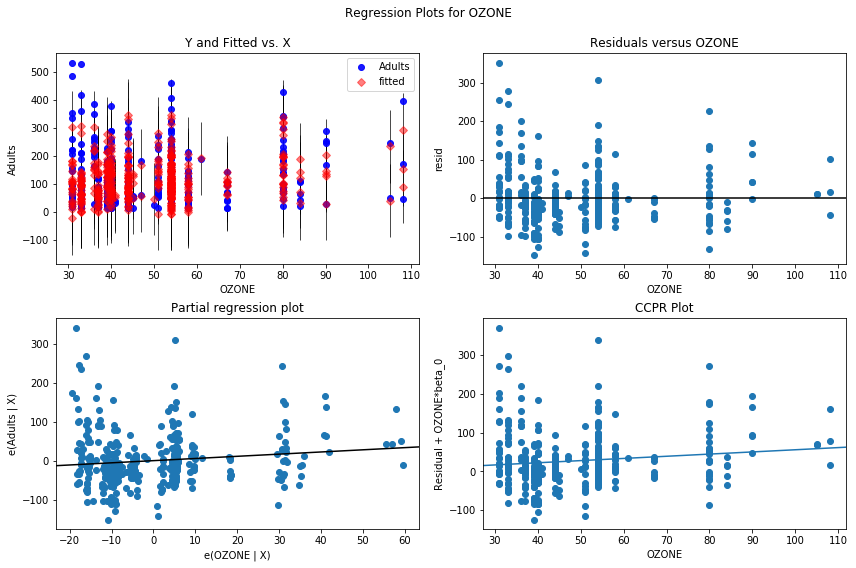

In [161]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "OZONE", fig=fig)

# SciKitLearn
* Package for machine learning models
* Structured like statsmodels: 
 * Create a model
 * Train on data
 * Output results object
* Very good documentation:
 * http://scikit-learn.org

# Clustering 
* Learn more about clustering here: <br>
http://scikit-learn.org/stable/modules/clustering.html
* Many algorithms, each good in different contexts
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png">

<h1>K-Means</h1>

<img src="rand.png">
<br>
<h3> Randomly pick k initial centroids </h3>

<h1>K-Means</h1>
<img src="agg1.png" style="height:60%"> <br>
<h3> Assign all points to nearest centroids</h3>

<h1>K-Means</h1>
<img src="new_cent.png" style="height:60%"><br>
<h3> Calculate new centroids for each set</h3>

<h1>K-Means</h1>
<img src="agg2.png" style="height:60%"><br>
<h3> Assign all points to nearest centroid</h3>

<h1>K-Means</h1>
<img src="cent2.png" style="height:60%"><br>
<h3>Calculate new centroids, assign points, continue until no change</h3>

# Prepare data
* Statsmodels default drops null values
* Drop rows with missing values first
* Standardize the data so they're all on the same scale

In [325]:
model_df = asthma_aqi.loc[:,['OZONE','PM2.5','Incidents',]]
model_df.dropna(axis=0,inplace=True)
model_df = (model_df - model_df.mean()) / (model_df.max() - model_df.min())

# Create and train the model
* Initialize a model with three clusters
* fit the model
* extract the labels

In [ ]:
asthma_air_clusters=cluster.KMeans(n_clusters = 3)
asthma_air_clusters.fit(model_df)
model_df['clusters3']=asthma_air_clusters.labels_

# Look At Clusters
* Our data are very closely clustered, OLS was probably not appropriate. 

Text(0.5,0,'Incidents')

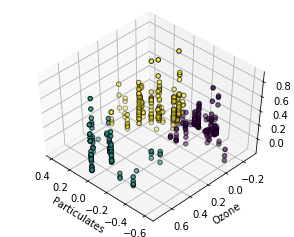

In [326]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

labels = asthma_air_clusters.labels_

ax.scatter(model_df.loc[:, 'PM2.5'], model_df.loc[:, 'OZONE'], model_df.loc[:, 'Incidents'],
           c=labels.astype(np.float), edgecolor='k')

ax.set_xlabel('Particulates')
ax.set_ylabel('Ozone')
ax.set_zlabel('Incidents')


# Your Turn
* Try a different number of clusters
* Add population data
* Try a different clustering algorithm

# Until Next Time

<img src="https://thumbs.gfycat.com/FairSomeBarnacle-max-14mb.gif">